In [159]:
import numpy as np
import pandas as pd

In [160]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [161]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4566,ham,But you were together so you should be thinkin...,NaN,NaN,NaN
3032,ham,"Aight, lemme know what's up",NaN,NaN,NaN
3217,ham,Don know:)this week i'm going to tirunelvai da.,NaN,NaN,NaN
1275,ham,Wot u up 2 u weirdo?,NaN,NaN,NaN
4612,ham,How much you got for cleaning,NaN,NaN,NaN


In [162]:
df.shape

(5572, 5)

1. Data Clening


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [164]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [165]:
df.sample(5)

,v1,v2
3392,ham,Ok thanx...
4192,ham,Ok i'm coming home now.
3294,ham,Dunno lei Ì_ all decide lor. How abt leona? Oo...
125,ham,"Good stuff, will do."
862,ham,"Sorry, I guess whenever I can get a hold of my..."


In [166]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
3378,ham,Dear umma she called me now :-)
596,ham,Gud mrng dear have a nice day
3933,ham,How come guoyang go n tell her? Then u told her?
3844,ham,Mmmm.... I cant wait to lick it!
5006,ham,Oh k. . I will come tomorrow


In [167]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [168]:
df['target']=encoder.fit_transform(df['target'])

0 = ham ,
1 = spam 

In [169]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [170]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [171]:
df.duplicated().sum()

np.int64(403)

In [172]:
df=df.drop_duplicates(keep='first')

In [173]:
df.duplicated().sum()
df.shape

(5169, 2)

2.EDA


In [174]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

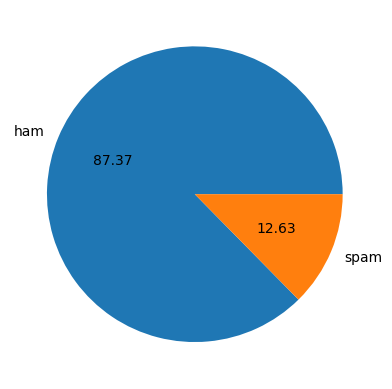

In [176]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [177]:
import nltk

In [178]:
# nltk.download('punkt_tab')
import nltk
import os

# Set download directory to your current project folder
nltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')
nltk.data.path.append(nltk_data_dir)

# Download stopwords to your project folder
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('punkt_tab', download_dir=nltk_data_dir)

[nltk_data] Downloading package stopwords to d:\ML-lab\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to d:\ML-lab\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [179]:
df['num_characters']=df['text'].apply(len)

In [180]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [181]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [182]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [183]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [184]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [185]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [186]:
#ham
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [187]:
#spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [188]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

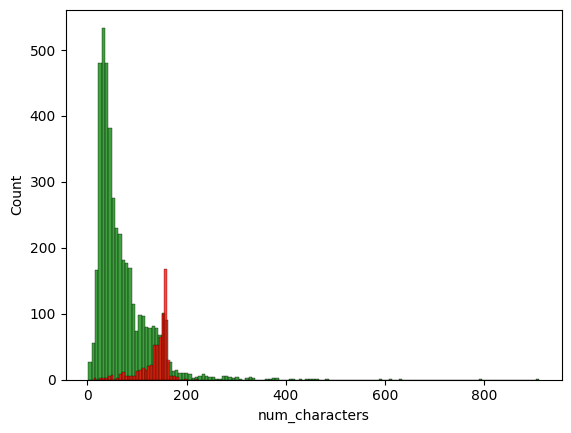

In [189]:
sns.histplot(df[df['target']==0]['num_characters'], color='green')
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

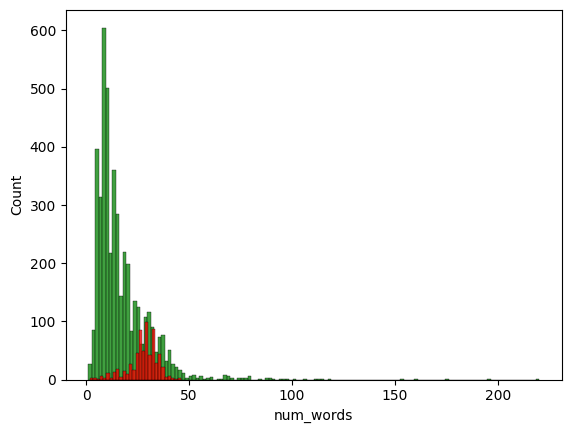

In [190]:
sns.histplot(df[df['target']==0]['num_words'], color='green')
sns.histplot(df[df['target']==1]['num_words'], color='red')

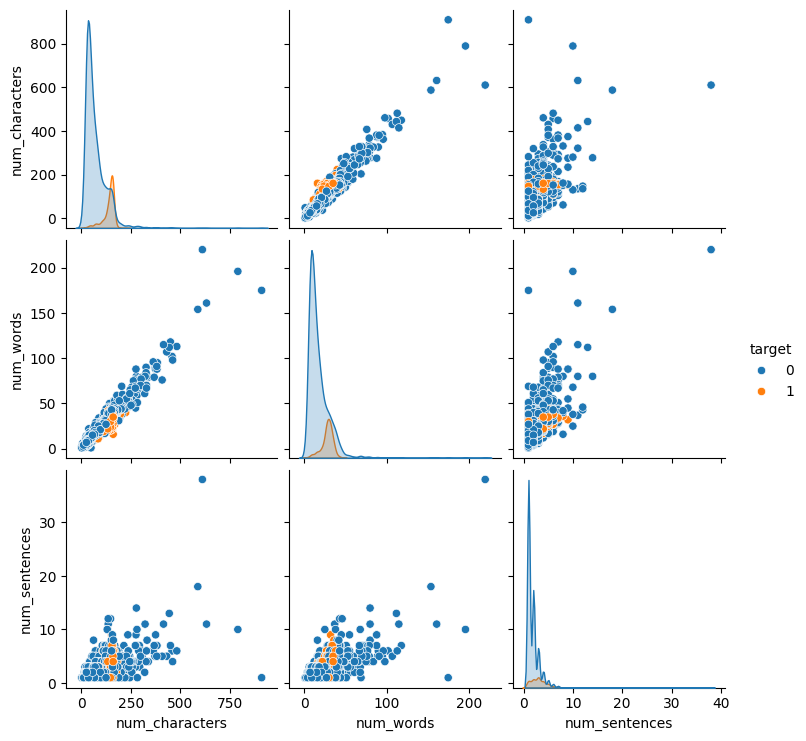

In [191]:
sns.pairplot(df, hue='target')

<Axes: >

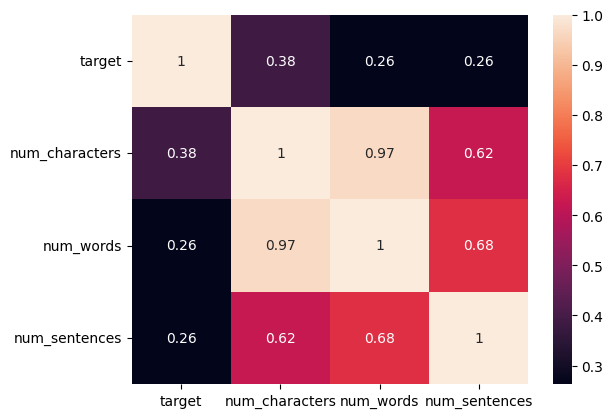

In [192]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

3. Data Preprocessing

In [193]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    #remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    # remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
     # stemming
    for i in text:
        y.append(ps.stem(i)) 

    return " ".join(y)

In [194]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [195]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [196]:
df['transformed_text'] = df['text'].apply(transform_text)

In [197]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [198]:
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [199]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

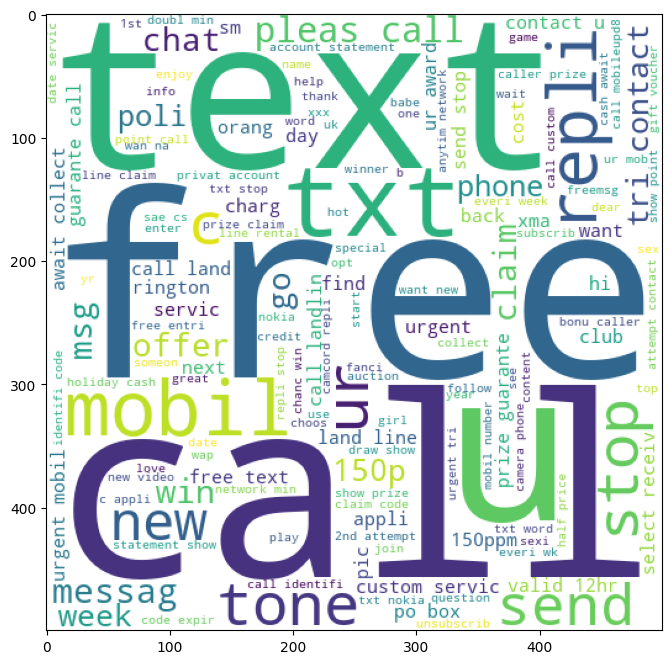

In [200]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

In [201]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

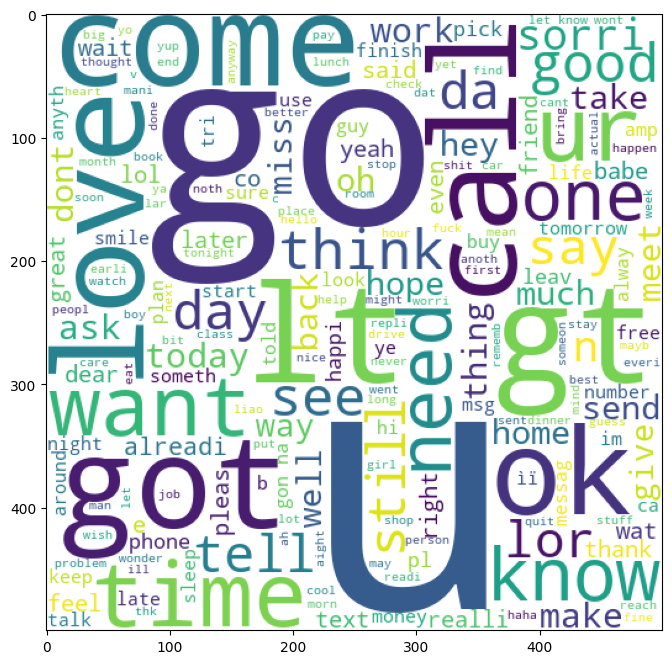

In [202]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [203]:
spam_corpus=[]
for msg in df[df['target']==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [204]:
len(spam_corpus)

9939

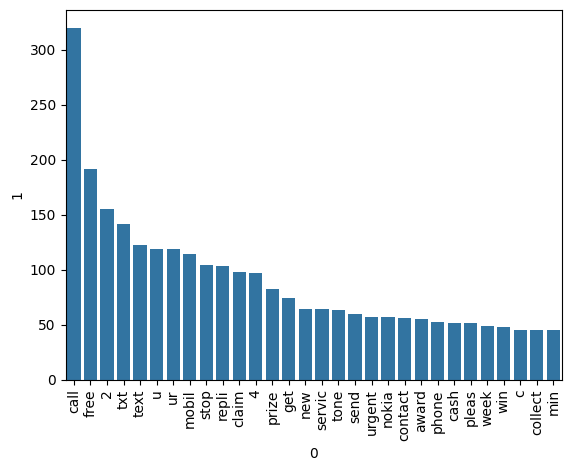

In [205]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [206]:
ham_corpus=[]
for msg in df[df['target']==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [207]:
len(ham_corpus)

35404

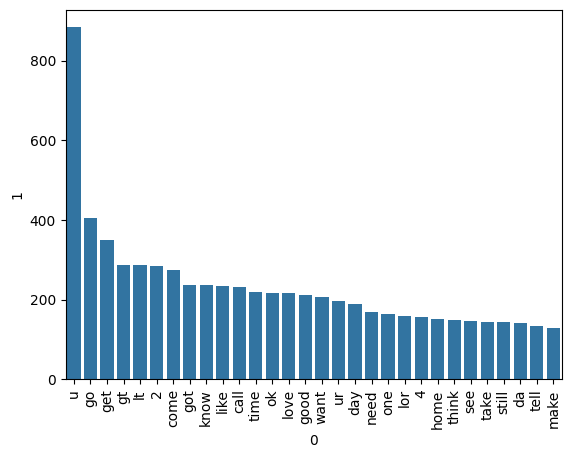

In [208]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4.Model Building

In [209]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf= TfidfVectorizer( max_features=3000)
cv=CountVectorizer()

In [210]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [211]:
y=df['target'].values

In [212]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [215]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [216]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [217]:
# gnb.fit(x_train, y_train)
# y_pred1=gnb.predict(x_test)
# print(" Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred1))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
# print("Precision Score: ", precision_score(y_test, y_pred1))

In [218]:
# mnb.fit(x_train, y_train)
# y_pred2=mnb.predict(x_test)
# print(accuracy_score(y_test, y_pred2))
# print(confusion_matrix(y_test, y_pred2))
# print( precision_score(y_test, y_pred2))

In [219]:
# bnb.fit(x_train, y_train)
# y_pred3=mnb.predict(x_test)
# print(accuracy_score(y_test, y_pred3))
# print(confusion_matrix(y_test, y_pred3))
# print( precision_score(y_test, y_pred3))

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [221]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
bgc= BaggingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [222]:
clfs={
  'SVC': svc,
  'KN': knc,
  'NB': mnb,
  'DT': dtc,
  'RF': rfc,
  'LR':lrc,
  'AdaBoost': abc,
  'Bgc': bgc,
  'ETC': etc,
  'GBDT': gbdt,
  'XGB': xgb
}

In [223]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision



In [224]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [225]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    acuracy, prec = train_classifier(clf, x_train, y_train, x_test, y_test)
    print(f"{name} - Accuracy: {acuracy}, Precision: {prec}")
    accuracy_scores.append(acuracy)
    precision_scores.append(prec)

SVC - Accuracy: 0.9758220502901354, Precision: 0.9747899159663865
KN - Accuracy: 0.9052224371373307, Precision: 1.0
NB - Accuracy: 0.9709864603481625, Precision: 1.0
DT - Accuracy: 0.9303675048355899, Precision: 0.8367346938775511
RF - Accuracy: 0.97678916827853, Precision: 0.975
LR - Accuracy: 0.9564796905222437, Precision: 0.9696969696969697
AdaBoost - Accuracy: 0.9235976789168279, Precision: 0.8390804597701149
Bgc - Accuracy: 0.9593810444874274, Precision: 0.8692307692307693
ETC - Accuracy: 0.9777562862669246, Precision: 0.967479674796748
GBDT - Accuracy: 0.9506769825918762, Precision: 0.9306930693069307
XGB - Accuracy: 0.9709864603481625, Precision: 0.95


In [226]:
performance_df = pd.DataFrame({'Classifier': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [227]:
performance_df

,Classifier,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
4,RF,0.976789,0.975000
0,SVC,0.975822,0.974790
5,LR,0.956480,0.969697
8,ETC,0.977756,0.967480
10,XGB,0.970986,0.950000
9,GBDT,0.950677,0.930693
7,Bgc,0.959381,0.869231
6,AdaBoost,0.923598,0.839080


In [228]:
performance_df1 = pd.melt(performance_df, id_vars="Classifier")

In [229]:
performance_df1

,Classifier,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.976789
3,SVC,Accuracy,0.975822
4,LR,Accuracy,0.956480
5,ETC,Accuracy,0.977756
6,XGB,Accuracy,0.970986
7,GBDT,Accuracy,0.950677
8,Bgc,Accuracy,0.959381
9,AdaBoost,Accuracy,0.923598


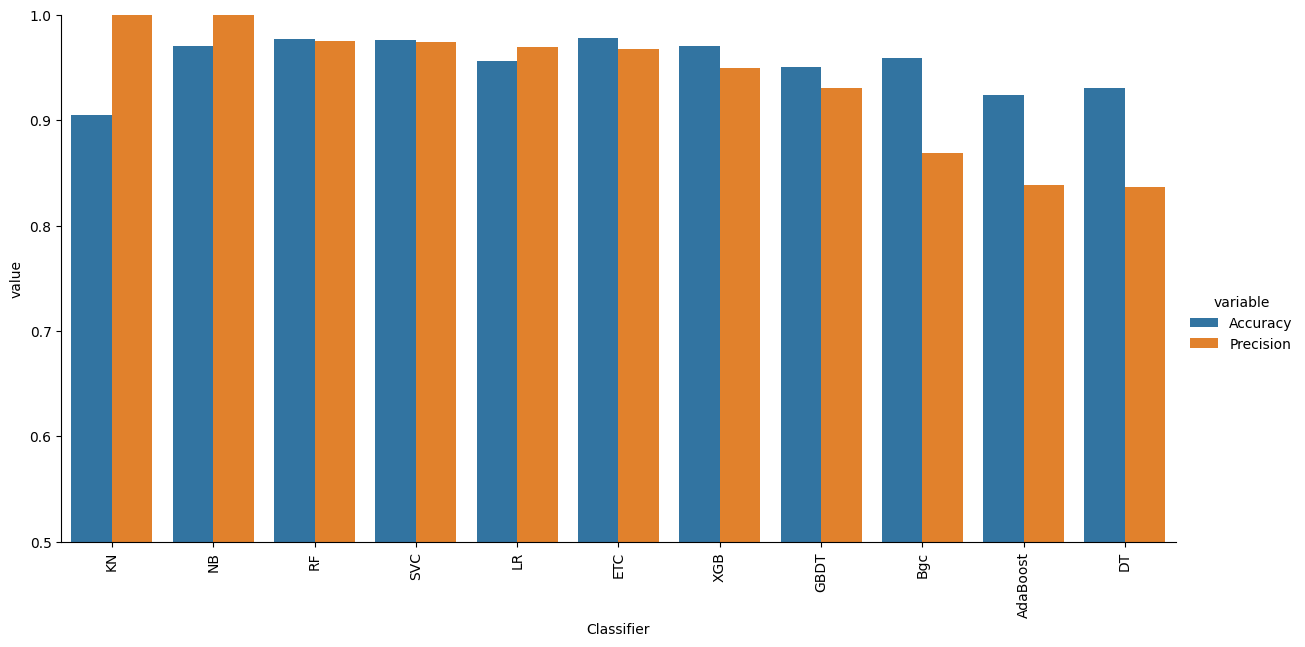

In [230]:
sns.catplot(x='Classifier', y='value', hue='variable', data=performance_df1, kind='bar', height=6, aspect=2)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model improve

In [231]:
temp_df=pd.DataFrame({'Classifier':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending=False )

In [232]:
temp_df=pd.DataFrame({'Classifier': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores}).sort_values('Precision_scaling', ascending=False)

In [233]:
new_df=performance_df.merge(temp_df, on='Classifier')

In [234]:
new_df_scaled=new_df.merge(temp_df, on='Classifier')

In [235]:
temp_df = pd.DataFrame({'Classifier': clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars': precision_scores}).sort_values('Precision_num_chars', ascending=False)

In [236]:
new_df_scaled.merge(temp_df, on='Classifier')

,Classifier,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,LR,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697,0.956480,0.969697
5,ETC,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480,0.977756,0.967480
6,XGB,0.970986,0.950000,0.970986,0.950000,0.970986,0.950000,0.970986,0.950000
7,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
8,Bgc,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231,0.959381,0.869231
9,AdaBoost,0.923598,0.839080,0.923598,0.839080,0.923598,0.839080,0.923598,0.839080


In [237]:
import pickle
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('mnb_model.pkl', 'wb'))